# Text Mining and Sentiment Analysis

- *In this project, we aim to conduct a comprehensive analysis of textual data using Python's powerful libraries for natural language processing (NLP) and sentiment analysis. The initial code snippets set the stage for our exploration. We leverage prominent libraries such as pandas, nltk, wordcloud, matplotlib, and seaborn to efficiently handle, preprocess, and visualize textual information. Furthermore, we utilize the SentimentIntensityAnalyzer from the Natural Language Toolkit (NLTK) to perform sentiment analysis on the text data. The inclusion of warning filters ensures a smooth execution of our code. As we delve into subsequent sections, we will witness the project's progression, from data loading and preprocessing to the generation of insightful visualizations and sentiment analysis results.*

# Importing the necessary Libraries

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Dataset Selection and Exploration

- Our journey into text mining and sentiment analysis begins with the selection of a suitable dataset. In this project, we opt for the **"movie_reviews"** dataset from the **Natural Language Toolkit (NLTK).** This dataset comprises movie reviews categorized into positive and negative sentiments, making it a valuable resource for sentiment analysis tasks. The code snippet utilizes the nltk library to download and access the movie_reviews dataset, laying the groundwork for our subsequent analyses. By exploring this dataset, we aim to gain insights into the sentiment expressed in movie reviews, employing NLP techniques to uncover patterns and trends within the text.

In [3]:
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

## Data Loading and Structuring

With our dataset selected, the next crucial step involves loading and structuring the data for effective analysis. Leveraging the NLTK library's **'movie_reviews'** corpus, we employ a list comprehension to extract the words and corresponding sentiment categories from the available reviews. The resulting **'documents'** list serves as the foundation of our analysis, where each element encapsulates a list of words from a movie review along with its associated sentiment category. This structured representation lays the groundwork for subsequent preprocessing steps and the overall exploration of sentiment patterns in movie reviews.

In [4]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

## Resource Download for Natural Language Processing

- Effective natural language processing (NLP) relies on the availability of essential linguistic resources. To ensure a robust analysis, we download key resources using the **Natural Language Toolkit (NLTK).** These resources include the **NLTK punkt tokenizer** models for tokenization, **stopwords** for filtering out common words, the **WordNet lexical database** for lemmatization, and the **VADER lexicon** for sentiment analysis. Additionally, the **Open Multilingual Wordnet (OMW)** resource is acquired, enriching our linguistic toolkit for a more comprehensive analysis. This strategic resource acquisition sets the stage for the subsequent preprocessing and sentiment analysis tasks in our project.

In [5]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Structuring the Data: DataFrame Creation

- As we delve deeper into our text mining and sentiment analysis project, the need arises to organize our dataset into a structured format conducive to analysis. Leveraging the Pandas library, we convert our previously generated 'documents' list into a DataFrame. This DataFrame, named 'df,' encapsulates the words from movie reviews and their corresponding sentiment categories. The creation of this structured representation enables seamless manipulation, exploration, and preprocessing of the data, paving the way for a more insightful analysis in the subsequent phases of our project.

In [6]:
# Convert the dataset to a DataFrame
df = pd.DataFrame(documents, columns=['words', 'sentiment'])

In [7]:
df

,words,sentiment
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg
2,"[it, is, movies, like, these, that, make, a, j...",neg
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg
...,...,...
1995,"[wow, !, what, a, movie, ., it, ', s, everythi...",pos
1996,"[richard, gere, can, be, a, commanding, actor,...",pos
1997,"[glory, --, starring, matthew, broderick, ,, d...",pos
1998,"[steven, spielberg, ', s, second, epic, film, ...",pos


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   words      2000 non-null   object
 1   sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [9]:
df.isna().sum()

words        0
sentiment    0
dtype: int64

In [10]:
df.describe().transpose()

,count,unique,top,freq
words,2000,2000,"[plot, :, two, teen, couples, go, to, a, churc...",1
sentiment,2000,2,neg,1000


In [11]:
df['sentiment'].value_counts()

neg    1000
pos    1000
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

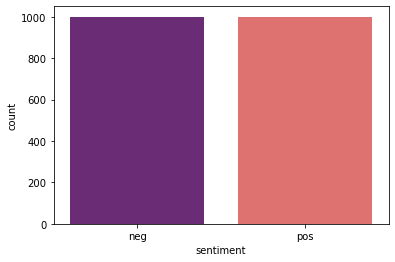

In [12]:
sns.countplot(x = df['sentiment'], data = df, palette='magma')

## A Function to Process the text:

In [13]:
def preprocess_text(words):
    # Tokenization
    tokens = [word.lower() for word in words if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

## Tokenization: Breaking Down the Text

- In the realm of natural language processing (NLP), the process of tokenization plays a pivotal role in dissecting textual data into smaller, meaningful units. Here, we initiate tokenization by converting words to lowercase, discarding non-alphanumeric characters, and creating a list of tokens. The resulting 'tokens' list becomes a fundamental building block for subsequent stages of our analysis. This meticulous breakdown of the text lays the groundwork for further preprocessing, enabling a more nuanced exploration of sentiment patterns within the movie reviews.

## Stopword Removal: Refining Textual Data

- Effective text mining involves the careful curation of textual content to extract meaningful insights. In our project, we take a crucial step by removing common stopwords—words that often appear frequently but carry limited semantic meaning. Leveraging the NLTK library, we create a set of English stopwords and filter our tokens to exclude these common words. This process, known as stopword removal, enhances the quality of our textual data, ensuring that subsequent analyses focus on the most informative and relevant content within the movie reviews.

## Stemming: Simplifying Word Variations

- In the quest to distill meaningful patterns from textual data, we employ the technique of stemming to reduce words to their root or base form. Here, the Porter stemming algorithm is applied to our tokens, simplifying variations of words and facilitating a more consolidated analysis. Stemming is a crucial preprocessing step that harmonizes different forms of words, ensuring a more unified representation of the underlying semantics. This streamlined representation sets the stage for a more efficient exploration of sentiment trends within the movie reviews.

## Lemmatization: Capturing Word Essence

- Continuing our journey through text preprocessing, we embrace lemmatization—a technique aimed at capturing the essential meaning of words by reducing them to their base or dictionary form. Employing the WordNet lemmatizer from NLTK, our tokens undergo this refining process, contributing to a more nuanced understanding of the movie reviews' content. Lemmatization ensures that words are represented in their most fundamental state, providing a more accurate foundation for subsequent sentiment analysis and exploration of textual nuances.

## Text Aggregation: Preprocessed Text Representation

- Our journey through text preprocessing culminates in the aggregation of refined tokens into a cohesive and processed text. The 'join' operation seamlessly combines the preprocessed tokens into a single string, creating the variable 'processed_text.' This consolidated representation serves as the final output of our meticulous preprocessing pipeline. The resulting 'processed_text' forms the basis for constructing a term frequency matrix, enabling a quantitative analysis of word occurrences within the movie reviews. As we move forward, this processed text becomes a key element in unraveling sentiment patterns embedded in the textual data.

In [14]:
df['preprocessed_words'] = df['words'].apply(preprocess_text)

In [15]:
df

,words,sentiment,preprocessed_words
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg,plot two teen coupl go church parti drink driv...
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg,happi bastard quick movi review damn y2k bug g...
2,"[it, is, movies, like, these, that, make, a, j...",neg,movi like make jade movi viewer thank invent t...
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg,quest camelot warner bro first featur length f...
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg,synopsi mental unstabl man undergo psychothera...
...,...,...,...
1995,"[wow, !, what, a, movie, ., it, ', s, everythi...",pos,wow movi everyth movi funni dramat interest we...
1996,"[richard, gere, can, be, a, commanding, actor,...",pos,richard gere command actor alway great film ev...
1997,"[glory, --, starring, matthew, broderick, ,, d...",pos,glori star matthew broderick denzel washington...
1998,"[steven, spielberg, ', s, second, epic, film, ...",pos,steven spielberg second epic film world war ii...


## Term Frequency Matrix Construction: Quantifying Word Occurrences

- In the realm of text mining, the construction of a term frequency matrix stands as a pivotal step in quantifying the occurrences of words within a dataset. Here, we employ the CountVectorizer from the scikit-learn library to transform our preprocessed text in 'preprocessed_words' into a numerical matrix. Each row in this matrix corresponds to a document (movie review), and each column corresponds to a unique word. The values within the matrix represent the frequency of each word's occurrence in the respective documents. This term frequency matrix becomes a fundamental tool for uncovering key insights into the distribution of words and their significance in the movie reviews.

In [16]:
# Construct a term frequency matrix
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
tf_matrix = vectorizer.fit_transform(df['preprocessed_words'])

## Sentiment Analysis with NLTK VADER

- As we transition from text preprocessing to sentiment analysis, the Natural Language Toolkit (NLTK) VADER (Valence Aware Dictionary and sEntiment Reasoner) tool takes center stage. This tool is specifically designed for sentiment analysis of text, providing a compound sentiment score that encapsulates the overall sentiment expressed in a given piece of text. Leveraging VADER, we apply sentiment intensity analysis to the 'words' in our DataFrame. The resulting 'compound' scores capture the sentiment polarity, facilitating a quantitative understanding of the sentiments conveyed in each movie review. This sentiment analysis sets the groundwork for further exploration of sentiment patterns within the dataset.

In [17]:
# Sentiment analysis using NLTK VADER
sid = SentimentIntensityAnalyzer()
df['compound'] = df['words'].apply(lambda x: sid.polarity_scores(' '.join(x))['compound'])

## Word Cloud Visualization: Unveiling Textual Patterns

- To visually encapsulate the essence of our preprocessed text, we turn to the captivating realm of word clouds. Here, the 'all_text' variable aggregates the preprocessed words from our DataFrame, forming a comprehensive representation of the textual content. Utilizing the WordCloud library, we generate a visually striking word cloud that accentuates the prominence of words based on their frequency. This visualization offers an intuitive and aesthetically pleasing insight into the most prevalent terms within the movie reviews. The word cloud becomes a powerful tool for identifying key themes and sentiments embedded in our textual data, setting the stage for a richer understanding of the movie reviews.

In [18]:
# Word cloud visualization
all_text = ' '.join(df['preprocessed_words'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

## Word Cloud Visualization: Unveiling Textual Patterns

- To visually encapsulate the essence of our preprocessed text, we turn to the captivating realm of word clouds. Here, the 'all_text' variable aggregates the preprocessed words from our DataFrame, forming a comprehensive representation of the textual content. Utilizing the WordCloud library, we generate a visually striking word cloud that accentuates the prominence of words based on their frequency. This visualization offers an intuitive and aesthetically pleasing insight into the most prevalent terms within the movie reviews. The word cloud becomes a powerful tool for identifying key themes and sentiments embedded in our textual data, setting the stage for a richer understanding of the movie reviews.

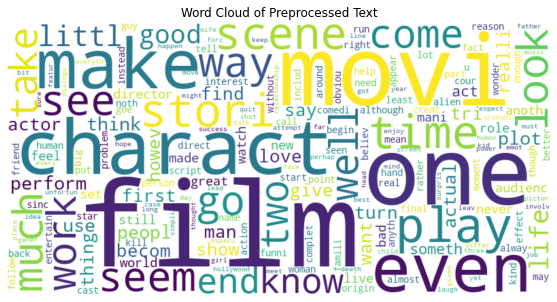

In [19]:
# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Preprocessed Text')
plt.show()

In [20]:
df

,words,sentiment,preprocessed_words,compound
0,"[plot, :, two, teen, couples, go, to, a, churc...",neg,plot two teen coupl go church parti drink driv...,0.9880
1,"[the, happy, bastard, ', s, quick, movie, revi...",neg,happi bastard quick movi review damn y2k bug g...,0.8534
2,"[it, is, movies, like, these, that, make, a, j...",neg,movi like make jade movi viewer thank invent t...,0.9725
3,"["", quest, for, camelot, "", is, warner, bros, ...",neg,quest camelot warner bro first featur length f...,-0.9235
4,"[synopsis, :, a, mentally, unstable, man, unde...",neg,synopsi mental unstabl man undergo psychothera...,0.9424
...,...,...,...,...
1995,"[wow, !, what, a, movie, ., it, ', s, everythi...",pos,wow movi everyth movi funni dramat interest we...,0.9996
1996,"[richard, gere, can, be, a, commanding, actor,...",pos,richard gere command actor alway great film ev...,-0.1269
1997,"[glory, --, starring, matthew, broderick, ,, d...",pos,glori star matthew broderick denzel washington...,-0.9662
1998,"[steven, spielberg, ', s, second, epic, film, ...",pos,steven spielberg second epic film world war ii...,0.9392
